In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import similaritymeasures

plt.rcParams.update({
                    "text.usetex": True,
                    'font.family': 'serif',
                     'lines.linewidth': 1,
                     'axes.linewidth': 0.5,
                     'xtick.major.width': 0.5,
                     'ytick.major.width': 0.5
                     })

In [2]:
# ----------
# Read Data 
# ----------
# Triaxial data D-666
datatx = pd.read_csv('tx_data.csv')
print(len(datatx))
e1x = datatx.e1[::9]
evx = datatx.ev[::9]
px = datatx.p[::9]
qx = datatx.q[::9]
ex = datatx.e[::9]
# Triaxial Norsand Simulation
datatx = pd.read_csv('Norsand_simulation.csv')
e1 = datatx.e1[:481:10]
ev = datatx.ev[:481:10]
p = datatx.p[:481:10]
q = datatx.q[:481:10]
e = datatx.e[:481:10]


280


In [3]:
# Generate experimental data
exp_data = np.zeros((len(e1x), 8))
exp_data[:, 0], exp_data[:, 1] = e1x, qx
exp_data[:, 2], exp_data[:, 3] = px, qx
exp_data[:, 4], exp_data[:, 5] = e1x, evx
exp_data[:, 6], exp_data[:, 7] = px, ex

# Generate numerical data
num_data = np.zeros((len(e1), 8))
num_data[:, 0], num_data[:, 1] = e1, q
num_data[:, 2], num_data[:, 3] = p, q
num_data[:, 4], num_data[:, 5] = e1, ev
num_data[:, 6], num_data[:, 7] = p, e

# Similarity Measures
pcm , dfd, area, clm, dtw= np.zeros((5,4))

for i in range(4):

    # quantify the difference between the two curves using PCM
    pcm[i] = similaritymeasures.pcm(exp_data[:,[2*i,2*i+1]], num_data[:,[2*i,2*i+1]])

    # quantify the difference between the two curves using
    # Discrete Frechet distance
    dfd[i] = similaritymeasures.frechet_dist(exp_data[:,[2*i,2*i+1]], num_data[:,[2*i,2*i+1]])

    # quantify the difference between the two curves using
    # area between two curves
    area[i] = similaritymeasures.area_between_two_curves(exp_data[:,[2*i,2*i+1]], num_data[:,[2*i,2*i+1]])

    # quantify the difference between the two curves using
    # Curve Length based similarity measure
    clm[i] = similaritymeasures.curve_length_measure(exp_data[:,[2*i,2*i+1]], num_data[:,[2*i,2*i+1]])

    # quantify the difference between the two curves using
    # Dynamic Time Warping distance
    dtw[i], d = similaritymeasures.dtw(exp_data[:,[2*i,2*i+1]], num_data[:,[2*i,2*i+1]])

# mean absolute error
# mae = similaritymeasures.mae(exp_data, num_data)

# mean squared error
# mse = similaritymeasures.mse(exp_data, num_data)

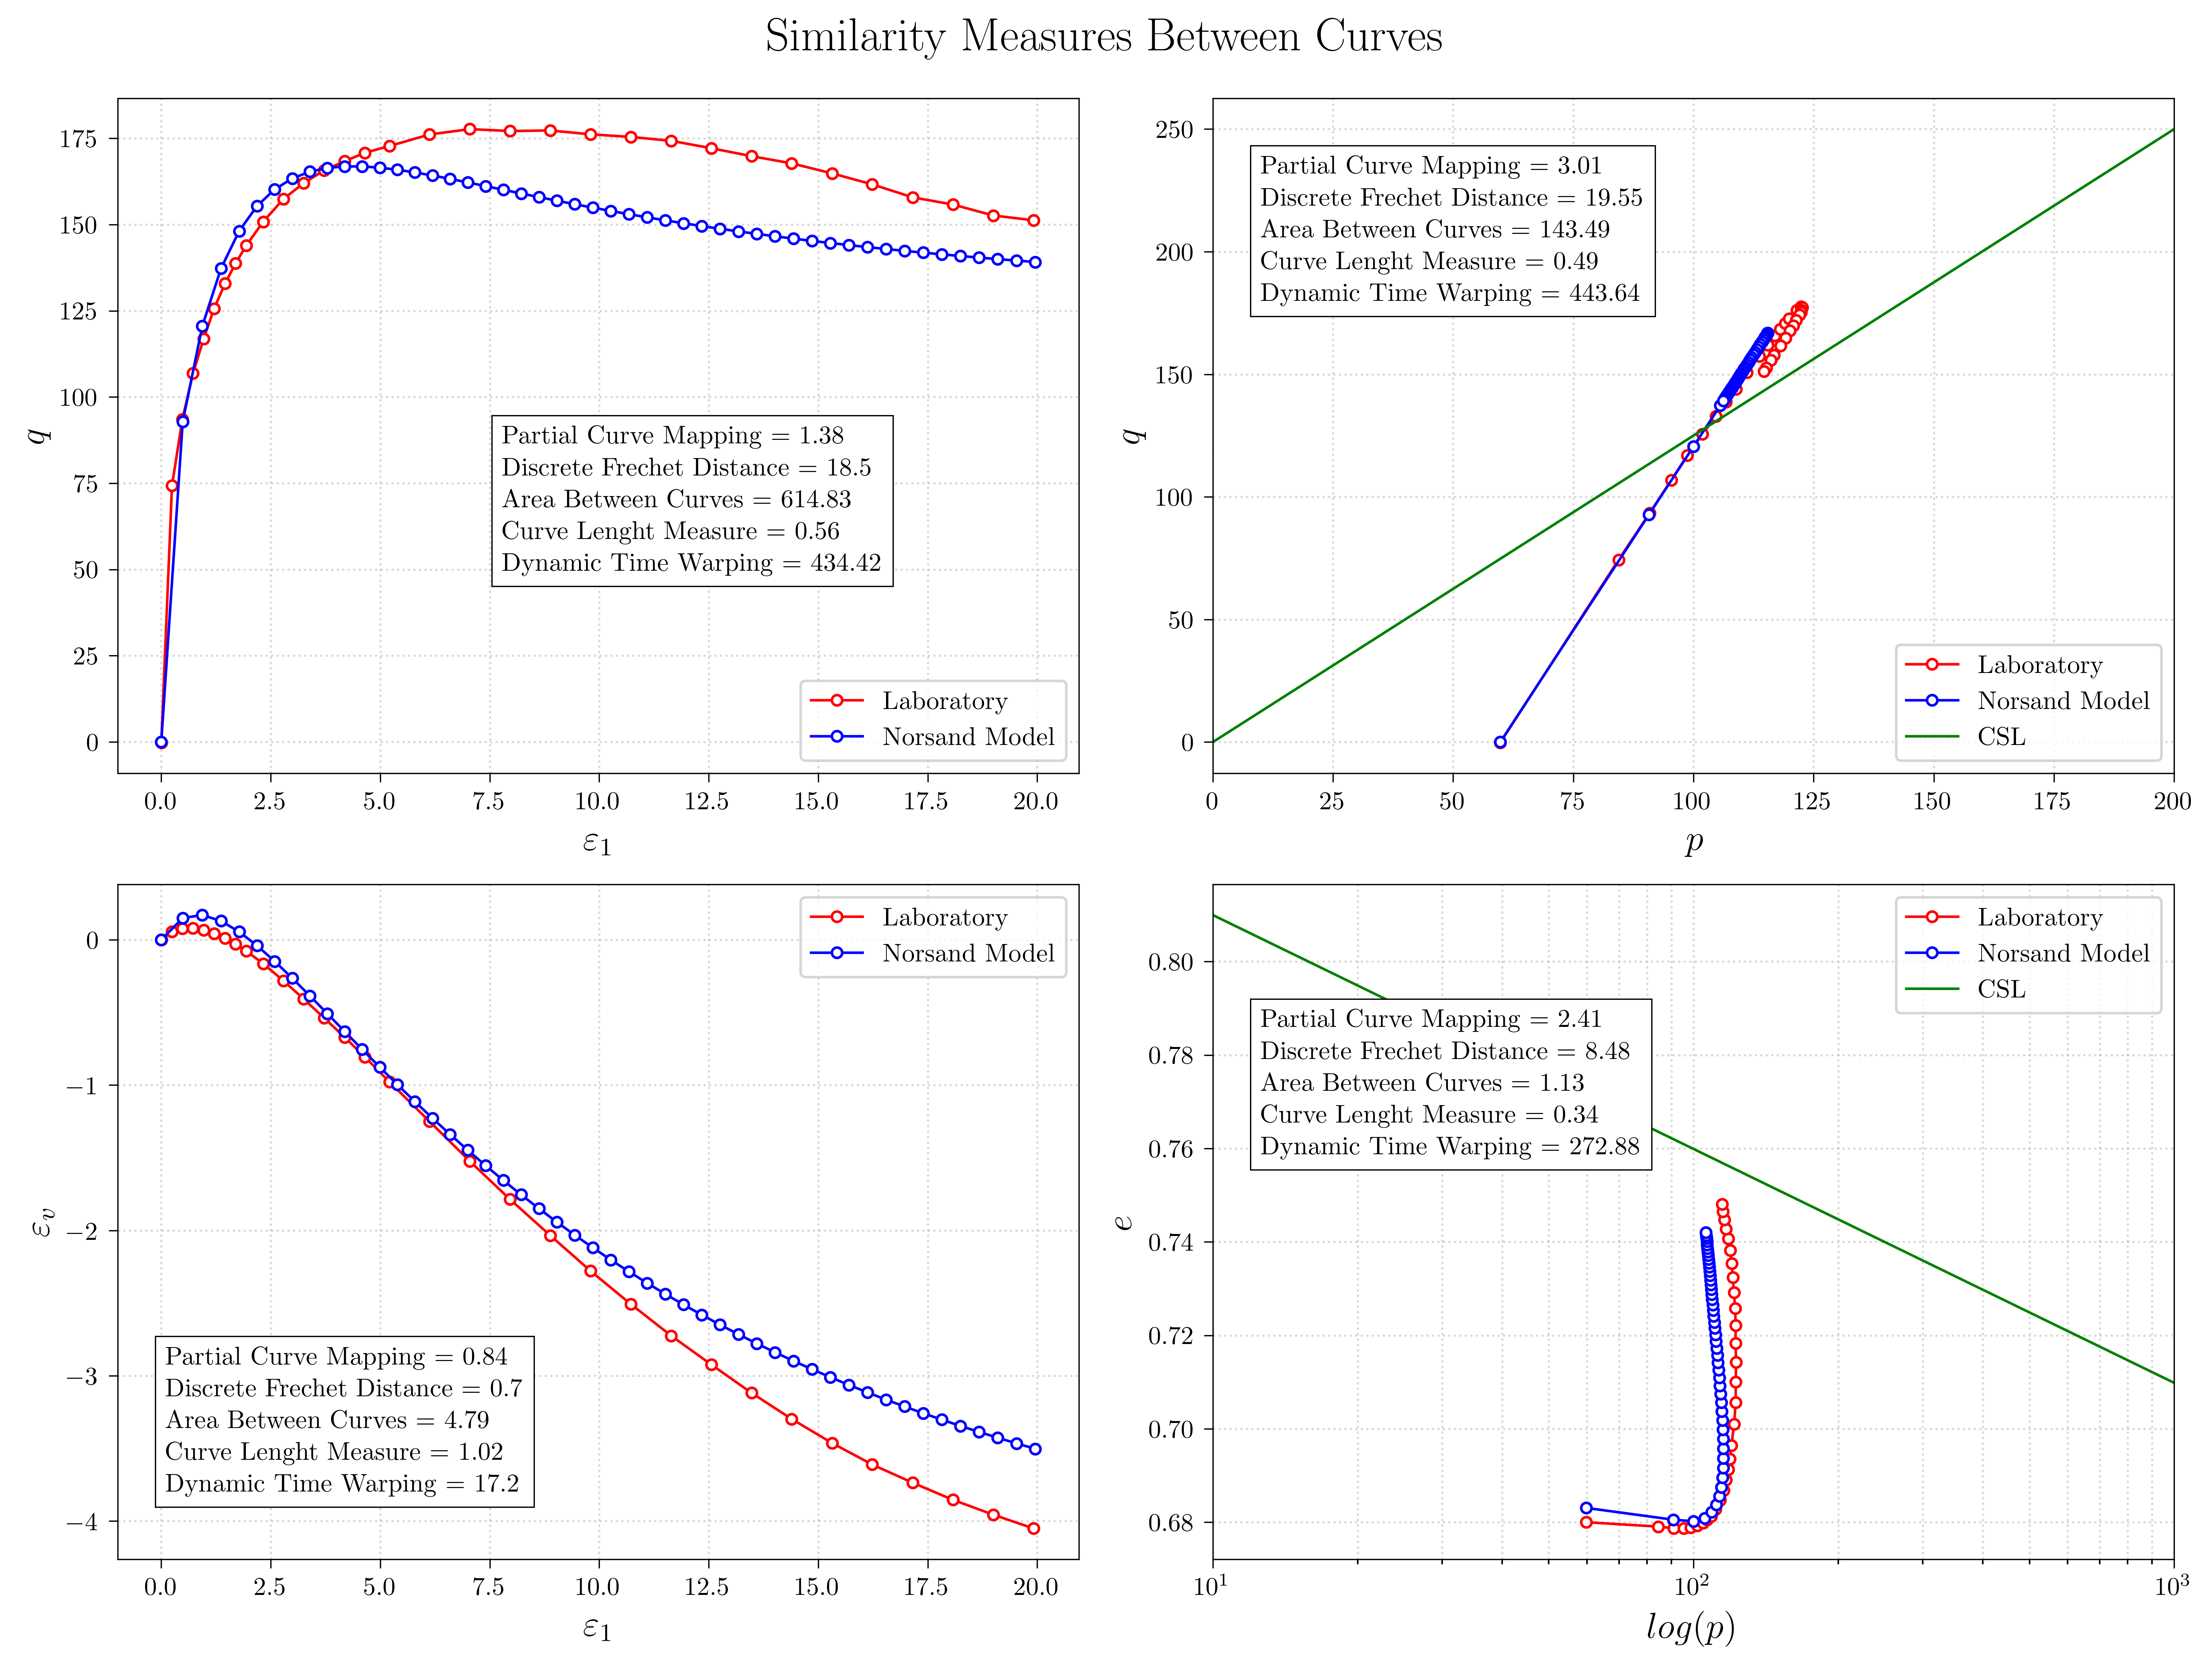

In [4]:
# Plot data & model results
pix = np.linspace(0, 200, 10)
pix_e = np.linspace(10, 1000, 10)
fig, axes = plt.subplots(2, 2, figsize=(12, 9), dpi=480)

# Plot e1 vs q
axes[0, 0].plot(e1x, qx, 'o-', mfc='white', c='red', ms = 4, label='Laboratory')
axes[0, 0].plot(e1, q, 'o-', mfc='white', c='blue', ms = 4, label='Norsand Model')
# axes[0, 0].set_xlim(0,20)
axes[0, 0].legend(loc='lower right')
axes[0, 0].set_xlabel(r'$\varepsilon_1$',fontsize=14)
axes[0, 0].set_ylabel(r'$q$',fontsize=14) 

# Plot p vs q
axes[0, 1].plot(px, qx, 'o-', mfc='white', c='red', ms = 4, label='Laboratory')
axes[0, 1].plot(p, q, 'o-', mfc='white', c='blue', ms = 4, label='Norsand Model')
axes[0, 1].plot(pix, 1.25*pix, '-', color='green', linewidth=1, label = 'CSL')
axes[0, 1].set_xlim(0,200)
axes[0, 1].legend(loc='lower right')
axes[0, 1].set_xlabel(r'$p$',fontsize=14)
axes[0, 1].set_ylabel(r'$q$',fontsize=14) 

# Plot e1 vs ev
axes[1, 0].plot(e1x, evx, 'o-', mfc='white', c='red', ms = 4, label='Laboratory')
axes[1, 0].plot(e1, ev, 'o-', mfc='white', c='blue', ms = 4, label='Norsand Model')
# axes[1, 0].set_xlim(0,20)
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_xlabel(r'$\varepsilon_1$',fontsize=14)
axes[1, 0].set_ylabel(r'$\varepsilon_v$',fontsize=14)

# Plot p (log scale) vs e
axes[1, 1].plot(px, ex, 'o-', mfc='white', c='red', ms = 4, label='Laboratory')
axes[1, 1].plot(p, e, 'o-', mfc='white', c='blue', ms = 4, label='Norsand Model')
axes[1, 1].plot(pix_e, 0.86 - (0.05/2.3)*np.log(pix_e), '-', color='green', linewidth=1, label = 'CSL')
axes[1, 1].set_xlim(10,1000)
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel(r'$log(p)$',fontsize=14)
axes[1, 1].set_ylabel(r'$e$',fontsize=14)

x = [0.4,0.05,0.05,0.05]
y = [0.3,0.7,0.1,0.6]
for i,ax in enumerate(axes.flatten()):
    ax.grid(which='both',ls=":",alpha=0.5)
    text = f"""Partial Curve Mapping = {pcm[i].round(2)}
Discrete Frechet Distance = {dfd[i].round(2)}
Area Between Curves = {area[i].round(2)}
Curve Lenght Measure = {clm[i].round(2)}
Dynamic Time Warping = {dtw[i].round(2)}"""
    ax.text(x[i],y[i],text,transform=ax.transAxes,fontsize=10,bbox=dict(facecolor='w', alpha=1, lw=0.5),linespacing=1.5)

fig.suptitle("Similarity Measures Between Curves", fontsize=18,fontweight="bold",y=0.99)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()